# College placement prediction

## 1. Import necessary libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv('placement-dataset.csv')
display(df.head())

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## 2. Simple Visualization

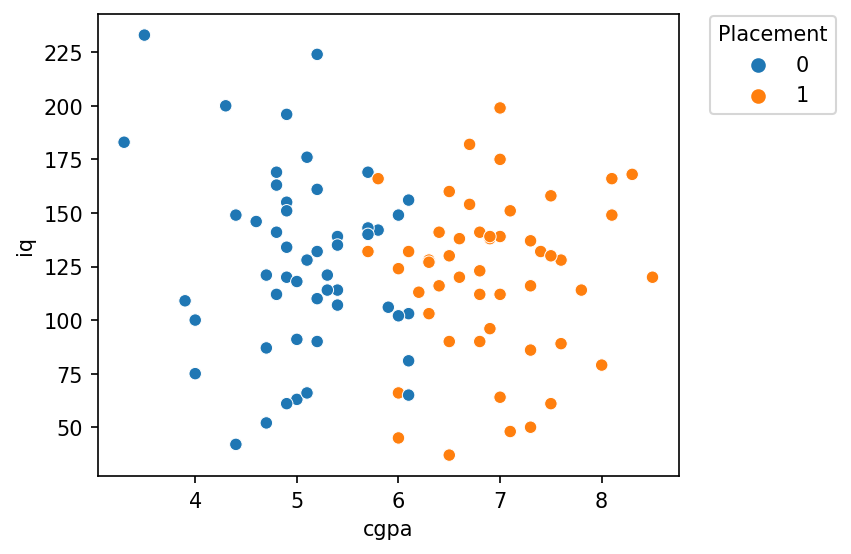

In [11]:
fig, ax = plt.subplots(figsize=(5, 4), dpi = 150)
sns.scatterplot(x = 'cgpa', y = 'iq', hue = 'placement', data = df, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, title = 'Placement')

## 3. Modeling

In [16]:
# Set up testing and training sets
X = df[['cgpa', 'iq']]
y = df['placement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

### 3.1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv = folds, scoring = 'f1')
avg_cv_score = np.mean(cv_scores)
print('Average cross validation f1 score: {:.3f}'.format(avg_cv_score))

lr.fit(X_train, y_train)
print('Training set accuracy: {:.3f}'.format(lr.score(X_train, y_train)))
y_pred_lr = lr.predict(X_test)
print('Test set accuracy: {:.3f}'.format(lr.score(X_test, y_test)))

print(classification_report(y_test, y_pred_lr))

Average cross validation f1 score: 0.931
Training set accuracy: 0.938
Test set accuracy: 0.850
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



/opt/homebrew/Caskroom/miniforge/base/envs/env_base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


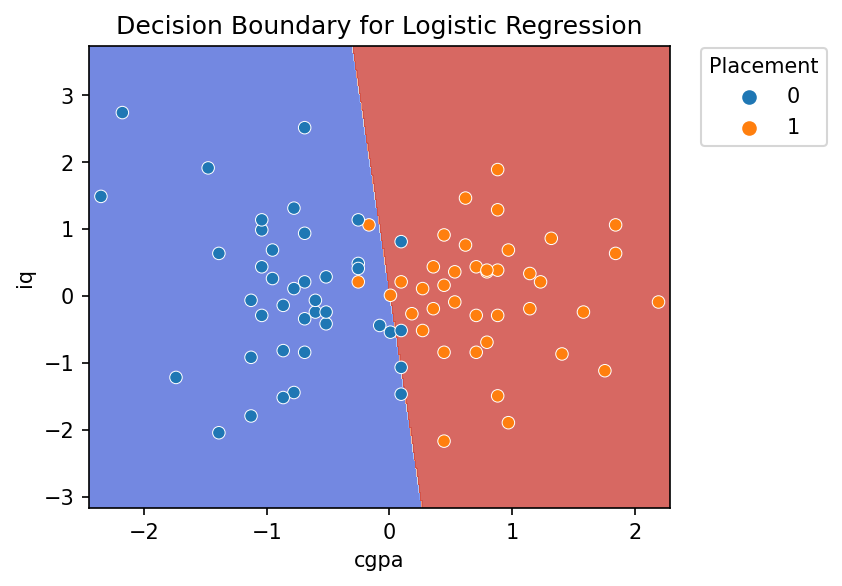

In [45]:
## Decision boundary

def plot_decision_boundary(model, X, y, model_name):
    h = 0.01
    x_min, x_max = X['cgpa'].min() - 0.1, X['cgpa'].max() + 0.1
    y_min, y_max = X['iq'].min() - 1, X['iq'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(5, 4), dpi = 150)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x = 'cgpa', y = 'iq', hue = 'placement', data = X.join(y), ax = ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, title = 'Placement')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Decision Boundary for {model_name}')
    plt.show()

plot_decision_boundary(lr, X_train, y_train, 'Logistic Regression')

### 3.2. Linear SVM

Average cross validation f1 score: 0.920
Train set accuracy: 0.912
Test set accuracy: 0.950
Confusion Matrix:
[[ 9  1]
 [ 0 10]]


/opt/homebrew/Caskroom/miniforge/base/envs/env_base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


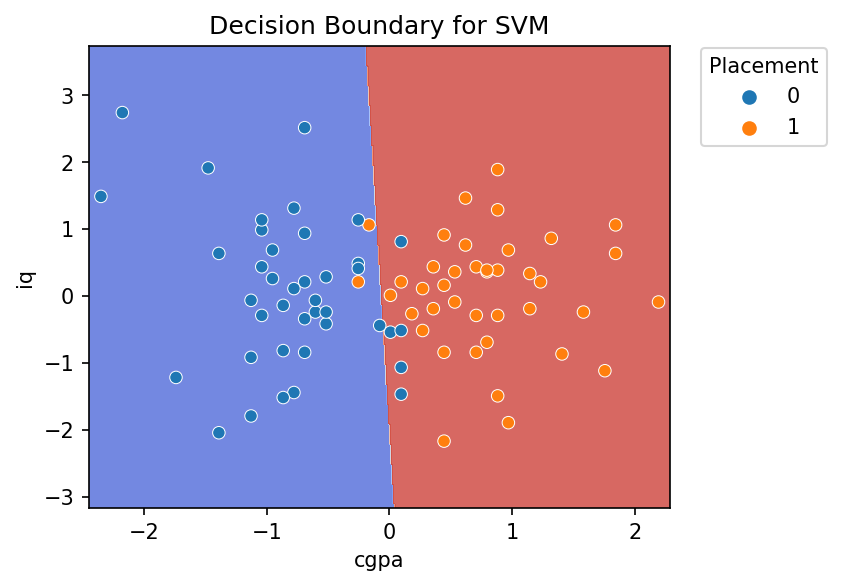

In [71]:
from sklearn.svm import SVC
# need to normalize data for SVM
X_norm = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state=42)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

sm = SVC(kernel='linear')
cv_scores = cross_val_score(sm, X_train, y_train, cv = folds, scoring = 'f1')
avg_cv_score = np.mean(cv_scores)
print('Average cross validation f1 score: {:.3f}'.format(avg_cv_score))

sm.fit(X_train, y_train)
print('Train set accuracy: {:.3f}'.format(sm.score(X_train, y_train)))
y_pred_sm = sm.predict(X_test)
print('Test set accuracy: {:.3f}'.format(sm.score(X_test, y_test)))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_sm))

plot_decision_boundary(sm, X_train, y_train, 'SVM')

## 3.3. SVM with RBF kernel

Average cross validation f1 score: 0.931
Train set accuracy: 0.950
Test set accuracy: 0.850
Confusion matrix
[[9 1]
 [2 8]]


/opt/homebrew/Caskroom/miniforge/base/envs/env_base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


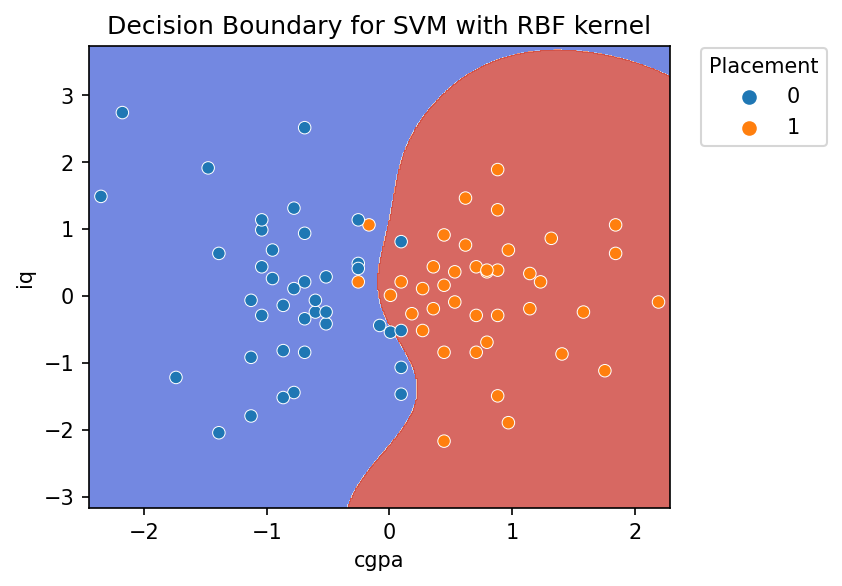

In [70]:
sm_rbf = SVC(kernel='rbf')

cv_scores = cross_val_score(sm_rbf, X_train, y_train, cv = folds, scoring = 'f1')
avg_cv_score = np.mean(cv_scores)
print('Average cross validation f1 score: {:.3f}'.format(avg_cv_score))

sm_rbf.fit(X_train, y_train)
y_pred_train = sm_rbf.predict(X_train)
print('Train set accuracy: {:.3f}'.format(sm_rbf.score(X_train, y_train)))
y_pred_sm_rbf = sm_rbf.predict(X_test)
print('Test set accuracy: {:.3f}'.format(sm_rbf.score(X_test, y_test)))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_sm_rbf))

plot_decision_boundary(sm_rbf, X_train, y_train, 'SVM with RBF kernel')


Kernal SVM is overfitting the data. We need to tune the hyperparameters.

## 3.4 Kernel SVM with hyperparameter tuning

Best cross-validation f1 score: 0.954
Best parameters:  {'C': 1, 'gamma': 1}
Train set accuracy: 0.963
Test set accuracy: 0.900
Confusion matrix:
[[10  0]
 [ 2  8]]


/opt/homebrew/Caskroom/miniforge/base/envs/env_base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


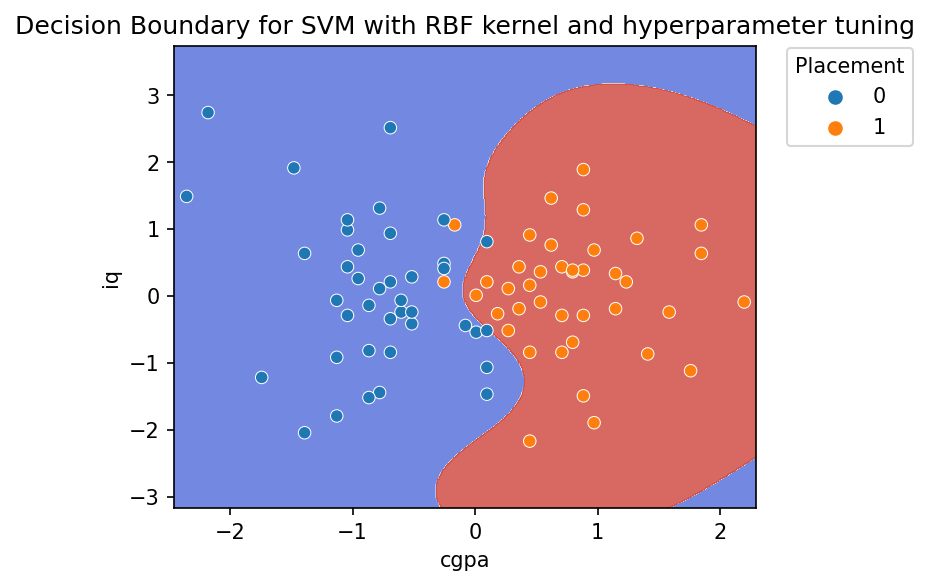

In [69]:
# Kernel SVM with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = folds, scoring = 'f1')
grid.fit(X_train, y_train)

print("Best cross-validation f1 score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

best_model = grid.best_estimator_
print('Train set accuracy: {:.3f}'.format(best_model.score(X_train, y_train)))
y_pred_best = best_model.predict(X_test)
print('Test set accuracy: {:.3f}'.format(best_model.score(X_test, y_test)))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_best))

plot_decision_boundary(best_model, X_train, y_train, 'SVM with RBF kernel and hyperparameter tuning')

Still very overfitting. Linear models are performing better than non-linear models.

### 3.5. KNN with hyperparameter tuning

Best cross-validation f1 score: 0.936
Best parameters:  {'n_neighbors': 2}
Average cross validation f1 score: 0.936
Train set accuracy: 0.963
Test set accuracy: 0.900
Confusion matrix:
[[10  0]
 [ 2  8]]


/opt/homebrew/Caskroom/miniforge/base/envs/env_base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


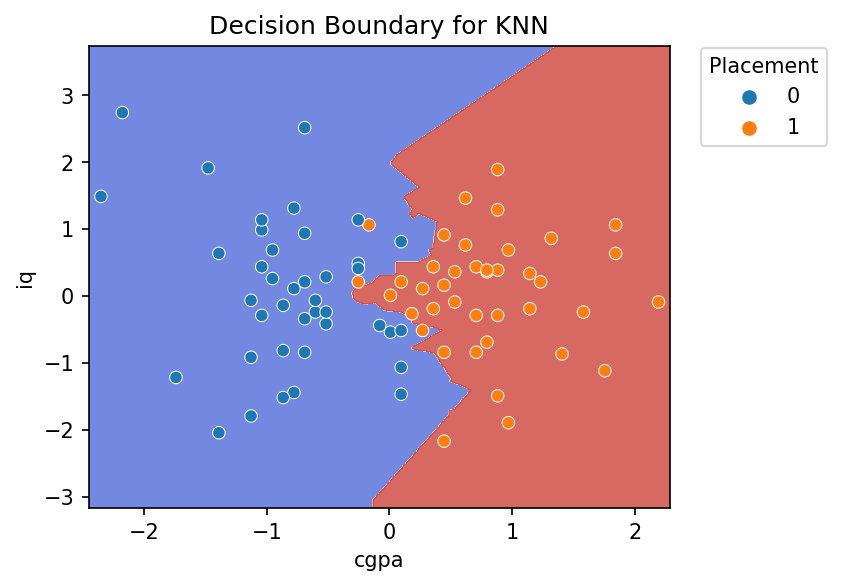

In [73]:
# knn
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 10)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = folds, scoring = 'f1')
grid.fit(X_train, y_train)

print("Best cross-validation f1 score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv = folds, scoring = 'f1')
avg_cv_score = np.mean(cv_scores)
print('Average cross validation f1 score: {:.3f}'.format(avg_cv_score))

best_model.fit(X_train, y_train)
print('Train set accuracy: {:.3f}'.format(best_model.score(X_train, y_train)))
y_pred_knn = best_model.predict(X_test)
print('Test set accuracy: {:.3f}'.format(best_model.score(X_test, y_test)))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_knn))

plot_decision_boundary(best_model, X_train, y_train, 'KNN')